In [1]:
##import packages
import csv
import numpy as np
import random
import math
import pandas as pd

#import from sklearn
from sklearn.decomposition import TruncatedSVD

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder,scale
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
import warnings 

warnings.filterwarnings("ignore") 

In [3]:
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test.csv")

In [4]:
XTrain_features=train_data.iloc[:, 1:]
YTrain_features=train_data.iloc[:, 0]
Xtest_features=test_data.iloc[:, 1:]
Ytest_features = test_data.iloc[:, 0]
XTrain_features.shape

(59999, 784)

In [5]:
#scaling the input train
scaler = MinMaxScaler()
XTrain_features = scaler.fit_transform(XTrain_features)

Xtest_features= scaler.fit_transform(Xtest_features)

In [6]:
## find best no of component while total variane is just above 90%
principle_component=[]
variance=[]
for i in range(1,785):
    trainsvd = TruncatedSVD(n_components=i).fit(XTrain_features)
    var=trainsvd.explained_variance_ratio_.sum()
    principle_component.append(i)
    variance.append(var )
   
    if(var>.900000000000000000):
        break


print("no of component ",i)

no of component  88


Text(0, 0.5, 'variance')

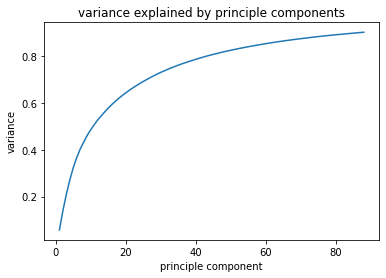

In [7]:

comp=np.array(principle_component)
var1=np.array(variance)
plt.title("variance explained by principle components")
plt.plot(comp, var1)
plt.xlabel('principle component')
plt.ylabel('variance')

In [8]:
#training data with svd
trainsvd = TruncatedSVD(n_components=88).fit(XTrain_features)
SVD_train=trainsvd.transform(XTrain_features)

print(SVD_train.shape)
#testing data with svd
testSVD= TruncatedSVD(n_components=88).fit(Xtest_features)
SVD_Test= testSVD.transform(Xtest_features)
print(SVD_Test.shape)

(59999, 88)
(9999, 88)


In [9]:
#gussian naive bayes

from sklearn.naive_bayes import GaussianNB

 #gaussian naive bayes without svd
nb = GaussianNB()
fit1=nb.fit(XTrain_features,YTrain_features)
nb_predict= fit1.predict(Xtest_features)
p=Ytest_features.to_numpy()

print("naive bayes accuracy without svd",accuracy_score( nb_predict,p))

#with svd


nb_svd = GaussianNB()
fit=nb_svd.fit(SVD_train,YTrain_features)
nb_predict_svd= fit.predict(SVD_Test)

print("naive bayes accuracy with svd",accuracy_score(p, nb_predict_svd))

naive bayes accuracy without svd 0.5546554655465546
naive bayes accuracy with svd 0.3422342234223422


In [10]:
##  logistic regression
from sklearn.linear_model import LogisticRegression


# without svd
model = LogisticRegression(C=0.1,multi_class='multinomial')

model.fit(XTrain_features,YTrain_features)
predict=model.predict(Xtest_features)
print('logistic regression accuracy without SVD', accuracy_score(Ytest_features, predict))

## predict with SVD 
model.fit(SVD_train,YTrain_features)
predict_svd=model.predict(SVD_Test)
print('logistic regression accuracy with SVD', accuracy_score(Ytest_features, predict_svd))

logistic regression accuracy without SVD 0.9255925592559255
logistic regression accuracy with SVD 0.1856185618561856


In [11]:
##  logistic regression
from sklearn.linear_model import LogisticRegression


# without svd
model = LogisticRegression(C=0.001,multi_class='multinomial')

model.fit(XTrain_features,YTrain_features)
predict=model.predict(Xtest_features)
print('logistic regression accuracy without SVD', accuracy_score(Ytest_features, predict))

## predict with SVD 
model.fit(SVD_train,YTrain_features)
predict_svd=model.predict(SVD_Test)
print('logistic regression accuracy with SVD', accuracy_score(Ytest_features, predict_svd))


logistic regression accuracy without SVD 0.9002900290029003
logistic regression accuracy with SVD 0.2084208420842084


In [12]:
##  logistic regression
from sklearn.linear_model import LogisticRegression


# without svd
model = LogisticRegression(C=1,multi_class='multinomial')

model.fit(XTrain_features,YTrain_features)
predict=model.predict(Xtest_features)
print('logistic regression accuracy without SVD', accuracy_score(Ytest_features, predict))

## predict with SVD 
model.fit(SVD_train,YTrain_features)
predict_svd=model.predict(SVD_Test)
print('logistic regression accuracy with SVD', accuracy_score(Ytest_features, predict_svd))

logistic regression accuracy without SVD 0.9252925292529253
logistic regression accuracy with SVD 0.18701870187018702


In [15]:
##  logistic regression
from sklearn.linear_model import LogisticRegression


# without svd
model = LogisticRegression(C=.0001,multi_class='multinomial')

model.fit(XTrain_features,YTrain_features)
predict=model.predict(Xtest_features)
print('logistic regression accuracy without SVD', accuracy_score(Ytest_features, predict))

## predict with SVD 
model.fit(SVD_train,YTrain_features)
predict_svd=model.predict(SVD_Test)
print('logistic regression accuracy with SVD', accuracy_score(Ytest_features, predict_svd))

logistic regression accuracy without SVD 0.857985798579858
logistic regression accuracy with SVD 0.22902290229022904


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


x_train,x_val, y_train, y_val= train_test_split(SVD_train, YTrain_features, test_size=0.20)
best_K=0
acc1=0

# finding the best k


for j in range (3,21,2):
    model=KNeighborsClassifier(n_neighbors=j)
    model.fit(x_train,y_train)
    pred=model.predict(x_val)
    acc=accuracy_score(y_val, pred)
    print("for k= ",j," accuracy is ",acc)

for k=  3  accuracy is  0.9746666666666667
for k=  5  accuracy is  0.9738333333333333
for k=  7  accuracy is  0.9725
for k=  9  accuracy is  0.9699166666666666
for k=  11  accuracy is  0.96875
for k=  13  accuracy is  0.968
for k=  15  accuracy is  0.9670833333333333
for k=  17  accuracy is  0.965
for k=  19  accuracy is  0.9635


In [17]:
#use the data without SVD
KNN= KNeighborsClassifier(n_neighbors=3)
KNN.fit(XTrain_features,YTrain_features)
KNN_predict=KNN.predict(Xtest_features)
print('KNN accuracy without SVD', accuracy_score(Ytest_features, KNN_predict))

## predict with SVD KNN
KNN.fit(SVD_train,YTrain_features)
KNN_predict_svd=KNN.predict(SVD_Test)
print('KNN accuracy with SVD', accuracy_score(Ytest_features, KNN_predict_svd))

KNN accuracy without SVD 0.9704970497049705
KNN accuracy with SVD 0.2569256925692569


In [18]:
#use the data without SVD
KNN= KNeighborsClassifier(n_neighbors=5)
KNN.fit(XTrain_features,YTrain_features)
KNN_predict=KNN.predict(Xtest_features)
print('KNN accuracy without SVD', accuracy_score(Ytest_features, KNN_predict))

## predict with SVD KNN
KNN.fit(SVD_train,YTrain_features)
KNN_predict_svd=KNN.predict(SVD_Test)
print('KNN accuracy with SVD', accuracy_score(Ytest_features, KNN_predict_svd))

KNN accuracy without SVD 0.9687968796879688
KNN accuracy with SVD 0.2563256325632563


In [ ]:
# from above calculation we can see the naive bayes,knn ,and logistic regression works well without svd.according to accuracy 
# without svd knn has highest accuracy and naive bayes has lowest accuracy.no model worked well with svd.